In [234]:
import numpy as np    
import pandas as pd    
import matplotlib.pyplot as plt  
import os  
import cartopy.crs as ccrs  
import cartopy.feature as cfeature  
import matplotlib.ticker as mticker  
from matplotlib.ticker import MultipleLocator, FuncFormatter
import xarray as xr
from matplotlib.colors import Normalize

In [245]:

df = xr.open_dataset(r'../../data/WOA_2023/1965-Now_Annual_si/1_woa23_all_i00_01.nc', decode_times=False)
df = df.sel(time=3894, method='nearest')
df = df.rename({'i_an':'P'})
df = df.where(df['depth']>=2000, drop=True)
# df = df.where(df['depth']<=4000, drop=True)
df

<xarray.Dataset> Size: 184kB
Dimensions:  (depth: 36, lat: 31, lon: 41)
Coordinates:
    time     float32 4B 3.894e+03
  * depth    (depth) float32 144B 2e+03 2.1e+03 2.2e+03 ... 5.4e+03 5.5e+03
  * lat      (lat) float32 124B -4.5 -3.5 -2.5 -1.5 -0.5 ... 22.5 23.5 24.5 25.5
  * lon      (lon) float32 164B 125.5 126.5 127.5 128.5 ... 163.5 164.5 165.5
Data variables:
    P        (depth, lat, lon) float32 183kB 126.6 127.7 127.7 ... 131.3 131.3
    crs      (depth) float64 288B -2.147e+09 -2.147e+09 ... -2.147e+09
Attributes: (12/46)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2023 : moles_of_silica...
    summary:                         
    references:                      Cross, S.L., H.E. Garcia, C. Bouchard, C...
    institution:                     NOAA National Centers for Environmental ...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2023-09-30 
    date_modified:                   2023-09-30 
    History:                         Translated to CF-1.0 Conventions by Netc...

In [246]:
selectec_lon_1 = 129.5
selectec_lon_2 = 130.5
df_lon_1 = df.sel(lon=selectec_lon_1)
df_lon_2 = df.sel(lon=selectec_lon_2)
p_1 = df_lon_1['P']
p_2 = df_lon_2['P']
si = (p_1+p_2)/2
si = si.values

lat_1 = df['lat'].values
depth_1 = df['depth'].values

TypeError: Shapes of x (75, 31) and z (56, 31) do not match

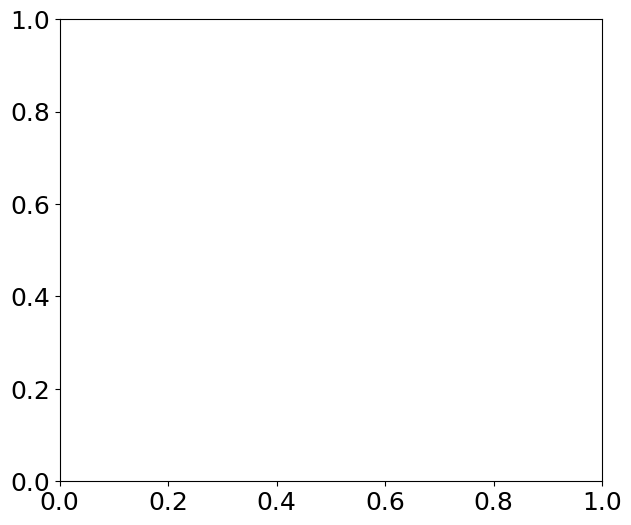

In [120]:
# 创建 meshgrid
meshgrid = np.meshgrid(lat, depth)

# 创建图形和子图
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)

# 绘制 contourf
cf = ax.contourf(meshgrid[0], meshgrid[1], p, 40, cmap=plt.cm.coolwarm)
c = ax.contour(meshgrid[0], meshgrid[1], p, 19, colors='gray', linewidths=0.5)
cl = ax.clabel(c, inline=1, fontsize=7)
# pc = ax.pcolormesh(meshgrid[0], meshgrid[1], p, cmap=plt.cm.coolwarm)
cabr = plt.colorbar(cf)
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth')

ax.set_xlim(8,20)
ax.set_ylim(1000, 6000)
ax.invert_yaxis()
# 显示图形
plt.show()


In [89]:
df_0 = pd.read_excel(r'D:\ze_1112\最新数据\NORC2022-09_Chl-a+营养盐_20240422更新_绘图使用数据.xls')
# df.dropna(inplace=True)
df_0 = df_0.rename(columns={'站位':'站位名'})
df_0

,站位名,水深（m）,叶绿素浓度（μg/L）,NH4+-N (μmol/L),NO3-N (μmol/L),NO2-N (μmol/L),PO4-P (μmol/L),SiO4-Si (μmol/L)
0,QB08,5,0.032143,0.03,0.0703,0.0267,0.1073,1.2367
1,QB08,75,0.068734,未检出,0.1103,0.0067,0.1083,1.2567
2,QB08,150,NaN,未检出,0.7503,0.0567,0.1643,1.5367
3,QB08,700,NaN,未检出,35.48333,0.02,2.31,72.4100
4,QB08,1000,NaN,未检出,38.73333,0.02,2.51,104.7600
...,...,...,...,...,...,...,...,...
493,N21-10,1000,NaN,未检出,38.24333,0.02,2.58,114.5600
494,N21-10,2000,NaN,未检出,38.24333,0.02,2.51,139.5000
495,N21-10,3000,NaN,未检出,37.68333,0.02,2.5,140.1100
496,N21-10,4000,NaN,未检出,36.28333,0.03,2.32,137.5900


In [90]:
stations = []
for i in df_0['站位名']:
    stations.append(i)
stations = list(set(stations))
print(stations)

['E130-06', 'E163-05', 'N21-13', 'E140-03orQB01', 'QB06', 'N03-02', 'E163-04', 'E163-02', 'QB04', 'E163-04s', 'N21-12', 'E140-11', 'E130-12', 'E140-07', 'E130-10', 'QB03', 'QB07', 'E130-08', 'N21-14', 'N03-03', 'E130-05', 'N21-11', 'E130-04', 'E163-07', 'E163-01', 'E130-03', 'E163-06', 'E130-02', 'FB01', 'E130-07', 'E140-08', 'E163-03', 'N21-10', 'N03-04', 'E163-06s', 'E130-13', 'E130-11', 'E130-09', 'QB08', 'E130-14']


In [91]:
def dms_to_decimal(dms):
    """将度分秒转换为十进制度数"""
    dms = dms.replace('°', ' ').replace('′', ' ').replace('″', ' ').replace('"E', ' ').replace('"N', ' ').replace('"S', ' ')
    parts = dms.split()
    degrees = float(parts[0])
    minutes = float(parts[1]) if len(parts) > 1 else 0
    seconds = float(parts[2]) if len(parts) > 2 else 0
    decimal = degrees + (minutes / 60) + (seconds / 3600)
    return decimal

In [92]:
stations_ctd = os.listdir(r'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表')
lonlat = []  
for i in stations_ctd:
    if i.endswith('.xls'):
        df = pd.read_excel(r'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表\%s' % i, skiprows=1, header=1)
        df = df.drop(0)
        longitude = df['经度'].apply(dms_to_decimal).values # type: ignore
        latitude = df['纬度'].apply(dms_to_decimal).values  # type: ignore
        name = df['站位名'].values
        lonlat.append((longitude[3], latitude[3], name[3]))
lonlat = pd.DataFrame(lonlat, columns=['lon', 'lat', '站位名'])
data_path = pd.merge( lonlat, df_0, on='站位名')

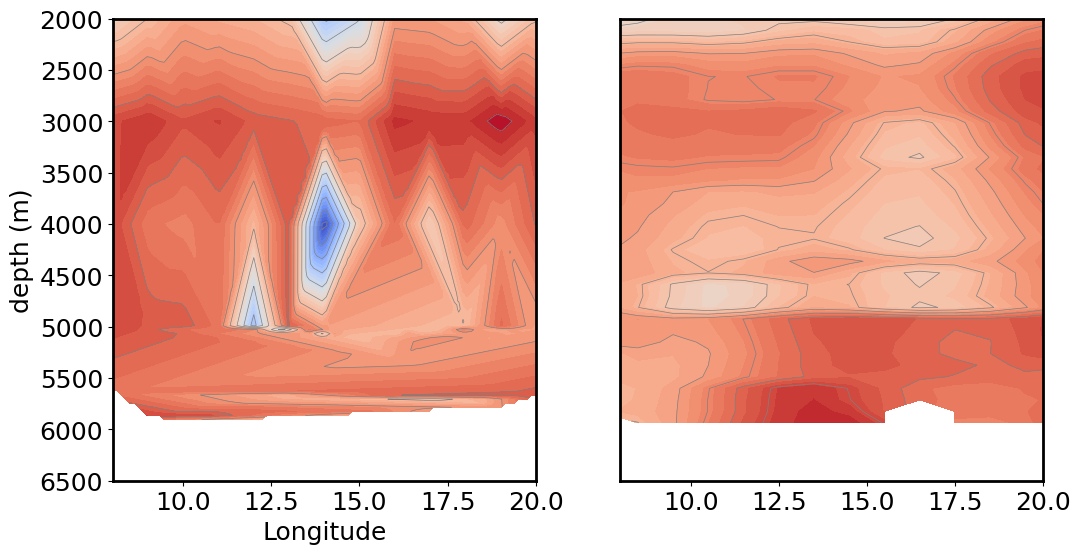

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# 选数据范围
df_cru = data_path[0:192]
df_cru = df_cru[df_cru['水深（m）']>=2000]
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

# 设置坐标轴标签
ax.set_ylabel('depth (m)')
ax.set_xlabel('Longitude')
ax.set_ylim(2000, 6500)
ax.set_xlim(8, 20)
ax.invert_yaxis()
ax.spines[:].set_linewidth(2)

# 获取经度、深度和 SiO4 浓度数据
longitude = df_cru['lon']
latitude = df_cru['lat']
depth = df_cru['水深（m）']
sio4_concentration = df_cru['SiO4-Si  (μmol/L)'].replace('未检出', np.nan)

# 创建网格
xi = np.linspace(latitude.min(), latitude.max(), 100)
yi = np.linspace(depth.min(), depth.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# 插值
from scipy.interpolate import griddata
zi = griddata((latitude, depth), sio4_concentration, (xi, yi), method='linear')

# 绘制等值线填充图
cf = ax.contourf(xi, yi, zi, levels=40, cmap='coolwarm')
cs = ax.contour(xi, yi, zi, levels=10, colors='grey', linewidths=0.5)
# pc = ax.pcolormesh(xi, yi, zi, cmap='coolwarm')
# cl = ax.clabel(cs, inline=1, fontsize=10, fmt='%1.1f')


# 添加颜色条
# cbar = fig.colorbar(cf, ax=ax)
# cbar.set_label('SiO4-Si  (μmol/L)')

# 绘制站点虚线
# stations = df_cru['站位名'].unique()
# for station in stations:
#     station_data = df_cru[df_cru['站位名'] == station]
#     ax.plot(station_data['lat'], station_data['水深（m）'], '--', color='gray', linewidth=2)
#     # 标注站点名称
#     ax.text(station_data['lat'].mean()+0.011, station_data['水深（m）'].mean(), station, color='grey', fontsize=10, verticalalignment='bottom')
# 添加网格
# ax.grid(True, linestyle='--', linewidth=1, color='gray', alpha=0.4)

# 创建 meshgrid
meshgrid = np.meshgrid(lat_1, depth_1)

# 创建图形和子图
# fig = plt.figure(figsize=(7, 6))
ax2 = fig.add_subplot(122)

# 绘制 contourf
cf_1 = ax2.contourf(meshgrid[0], meshgrid[1], p, 40, cmap=plt.cm.coolwarm)
c_1 = ax2.contour(meshgrid[0], meshgrid[1], p, 19, colors='gray', linewidths=0.5)
cl_1 = ax2.clabel(c, inline=1, fontsize=7)
# pc = ax.pcolormesh(meshgrid[0], meshgrid[1], p, cmap=plt.cm.coolwarm)
# cabr_1 = plt.colorbar(cf)

ax2.set_xlim(8,20)
ax2.set_ylim(2000, 6000)
ax2.set_yticks([])
ax2.spines[:].set_linewidth(2)
ax2.invert_yaxis()
# 显示图形
plt.savefig('jiemian.png' ,dpi=300)

In [201]:
print(lat_1.shape, depth_1.shape, si.shape)

(31,) (36,) (36, 31)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22116\3102101701.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000'],rotation=45)


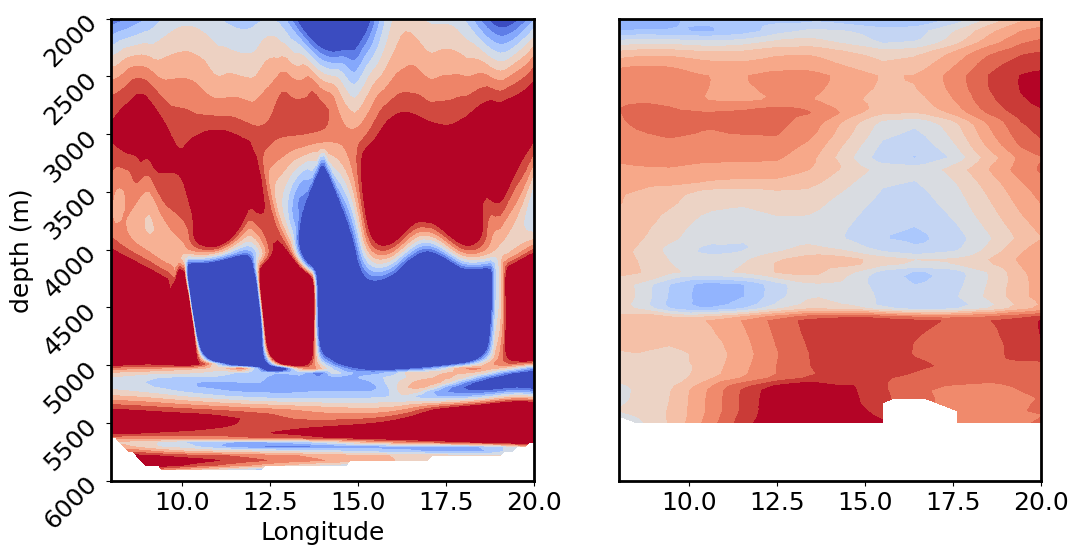

In [247]:

# 选数据范围
df_cru = data_path[0:192]
df_cru = df_cru[df_cru['水深（m）']>=2000]
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

# 设置坐标轴标签
ax.set_ylabel('depth (m)')
ax.set_xlabel('Longitude')
ax.set_ylim(2000, 6000)
ax.set_yticklabels(['2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000'],rotation=45)
ax.set_xlim(8, 20)
ax.invert_yaxis()
ax.spines[:].set_linewidth(2)

# 获取经度、深度和 SiO4 浓度数据
longitude = df_cru['lon']
latitude = df_cru['lat']
depth = df_cru['水深（m）']
sio4_concentration = df_cru['SiO4-Si  (μmol/L)'].replace('未检出', np.nan)

# 创建网格
xi = np.linspace(latitude.min(), latitude.max(), 100)
yi = np.linspace(depth.min(), depth.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# 插值
from scipy.interpolate import griddata
zi = griddata((latitude, depth), sio4_concentration, (xi, yi), method='cubic')
# 绘制等值线填充图
norm = Normalize(vmin=138, vmax=145)
cf = ax.contourf(xi, yi, zi, levels=100, cmap='coolwarm', norm=norm)
# cs = ax.contour(xi, yi, zi, levels=12, colors='grey', linewidths=0.5)

meshgrid = np.meshgrid(lat_1, depth_1)
# cubic插值
xi_1 = np.linspace(lat_1.min(), lat_1.max(), 100)
yi_1 = np.linspace(depth_1.min(), depth_1.max(), 100)
xi_1, yi_1 = np.meshgrid(xi_1, yi_1)
si_interp = griddata((np.tile(lat_1, len(depth_1)), np.repeat(depth_1, len(lat_1))), si.flatten(), (xi_1, yi_1), method='linear')

ax2 = fig.add_subplot(122)

# 绘制 contourf
norm_1 = Normalize(vmin=135, vmax=143)
cf_1 = ax2.contourf(xi_1, yi_1, si_interp, 15, cmap='coolwarm', norm=norm_1)
# c_1 = ax2.contour(xi_1, yi_1, si_interp, 10, colors='gray', linewidths=0.5)
cl_1 = ax2.clabel(c, inline=1, fontsize=7)
# pc = ax.pcolormesh(meshgrid[0], meshgrid[1], p, cmap=plt.cm.coolwarm)
# cabr_1 = plt.colorbar(cf)

ax2.set_xlim(8,20)
ax2.set_ylim(2000, 6000)
ax2.set_yticks([])
ax2.spines[:].set_linewidth(2)
ax2.invert_yaxis()
# 显示图形

plt.savefig('jiemian.png' ,bbox_inches='tight', dpi=300)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22116\1083760856.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000'], rotation=45)


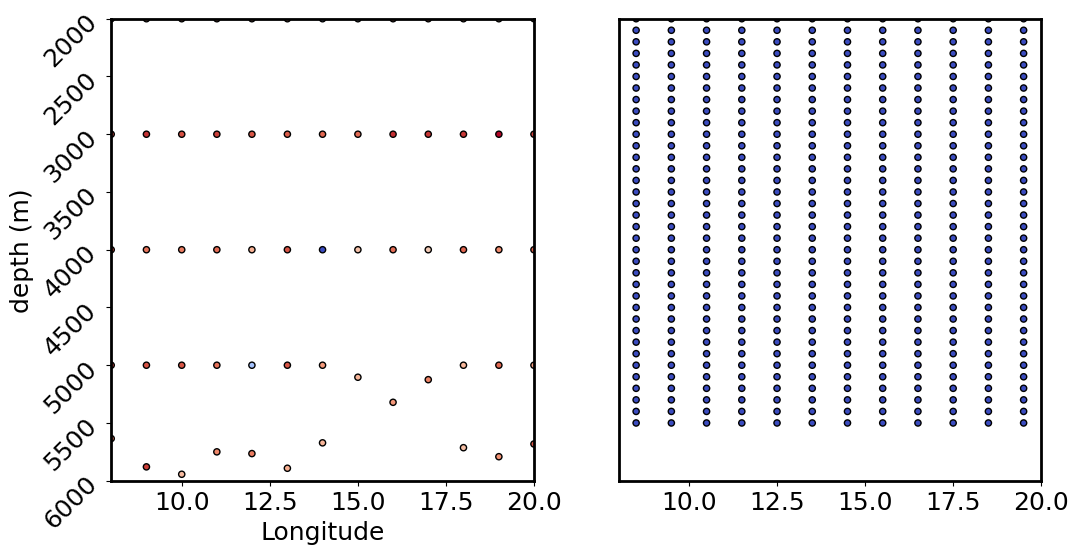

In [239]:
import matplotlib.pyplot as plt
import numpy as np

# 选数据范围
df_cru = data_path[0:192]
df_cru = df_cru[df_cru['水深（m）'] >= 2000]
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

# 设置坐标轴标签
ax.set_ylabel('depth (m)')
ax.set_xlabel('Longitude')
ax.set_ylim(2000, 6000)
ax.set_yticklabels(['2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000'], rotation=45)
ax.set_xlim(8, 20)
ax.invert_yaxis()
ax.spines[:].set_linewidth(2)

# 获取经度、深度和 SiO4 浓度数据
longitude = df_cru['lon']
latitude = df_cru['lat']
depth = df_cru['水深（m）']
sio4_concentration = df_cru['SiO4-Si  (μmol/L)'].replace('未检出', np.nan)

# 绘制散点图
sc = ax.scatter(latitude, depth, c=sio4_concentration, cmap='coolwarm', edgecolors='k', s=20)

# 添加颜色条
# cbar = fig.colorbar(sc, ax=ax)
# cbar.set_label('SiO4-Si  (μmol/L)')

# 创建第二个子图
ax2 = fig.add_subplot(122)

# 假设 lat_1 和 depth_1 是你的数据

# 创建 meshgrid
meshgrid = np.meshgrid(lat_1, depth_1)

# 假设 si 是你的数据
si = np.zeros(meshgrid[0].shape)

# 绘制 contourf
# cf_1 = ax2.contourf(meshgrid[0], meshgrid[1], si, 40, cmap='coolwarm')
# c_1 = ax2.contour(meshgrid[0], meshgrid[1], si, 19, colors='gray', linewidths=0.5)
sc_2 = ax2.scatter(meshgrid[0], meshgrid[1], c=si, cmap='coolwarm', edgecolors='k', s=20)
# 关闭右侧子图的刻度
# ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlim(8, 20)
ax2.set_ylim(2000, 6000)
ax2.spines[:].set_linewidth(2)
ax2.invert_yaxis()

# 保存图形
plt.savefig('数据点.png', bbox_inches='tight', dpi=300)
# plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22116\20233201.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['2000', '2250', '2500', '2750', '3000', '3250', '3500', '3750', '4000'],rotation=45)


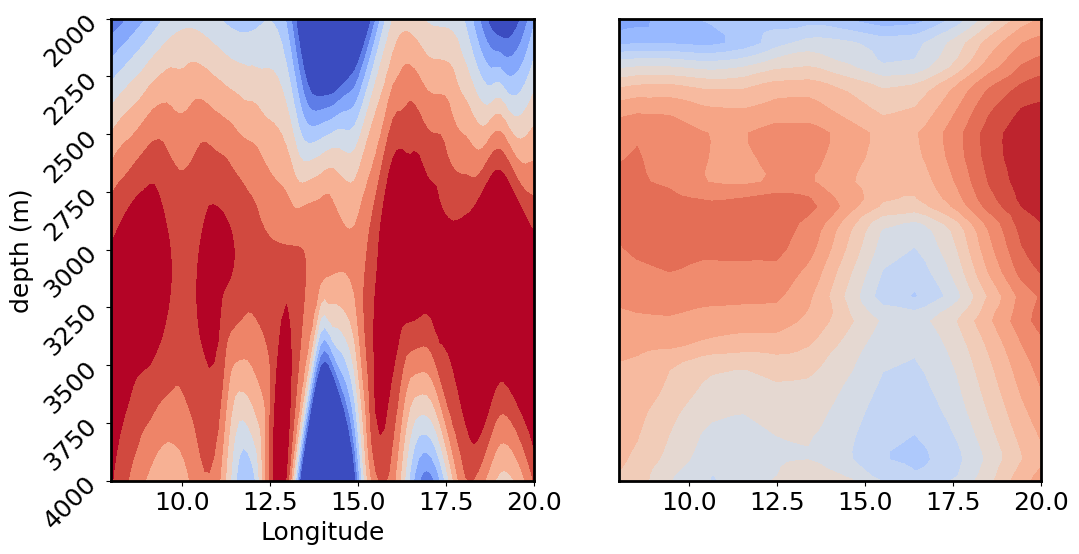

In [253]:

# 选数据范围
df_cru = data_path[0:192]
df_cru = df_cru[df_cru['水深（m）']>=2000]
df_cru = df_cru[df_cru['水深（m）']<=4000]
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)

# 设置坐标轴标签
ax.set_ylabel('depth (m)')
ax.set_xlabel('Longitude')
ax.set_ylim(2000, 4000)
ax.set_yticklabels(['2000', '2250', '2500', '2750', '3000', '3250', '3500', '3750', '4000'],rotation=45)
ax.set_xlim(8, 20)
ax.invert_yaxis()
ax.spines[:].set_linewidth(2)

# 获取经度、深度和 SiO4 浓度数据
longitude = df_cru['lon']
latitude = df_cru['lat']
depth = df_cru['水深（m）']
sio4_concentration = df_cru['SiO4-Si  (μmol/L)'].replace('未检出', np.nan)

# 创建网格
xi = np.linspace(latitude.min(), latitude.max(), 100)
yi = np.linspace(depth.min(), depth.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# 插值
from scipy.interpolate import griddata
zi = griddata((latitude, depth), sio4_concentration, (xi, yi), method='cubic')
# 绘制等值线填充图
norm = Normalize(vmin=138, vmax=145)
cf = ax.contourf(xi, yi, zi, levels=30, cmap='coolwarm', norm=norm)
# cs = ax.contour(xi, yi, zi, levels=12, colors='grey', linewidths=0.5)

meshgrid = np.meshgrid(lat_1, depth_1)
# cubic插值
xi_1 = np.linspace(lat_1.min(), lat_1.max(), 100)
yi_1 = np.linspace(depth_1.min(), depth_1.max(), 100)
xi_1, yi_1 = np.meshgrid(xi_1, yi_1)
si_interp = griddata((np.tile(lat_1, len(depth_1)), np.repeat(depth_1, len(lat_1))), si.flatten(), (xi_1, yi_1), method='linear')

ax2 = fig.add_subplot(122)

# 绘制 contourf
norm_1 = Normalize(vmin=135, vmax=143)
cf_1 = ax2.contourf(xi_1, yi_1, si_interp, 20, cmap='coolwarm', norm=norm_1)
# c_1 = ax2.contour(xi_1, yi_1, si_interp, 10, colors='gray', linewidths=0.5)
cl_1 = ax2.clabel(c, inline=1, fontsize=7)
# pc = ax.pcolormesh(meshgrid[0], meshgrid[1], p, cmap=plt.cm.coolwarm)
# cabr_1 = plt.colorbar(cf)

ax2.set_xlim(8,20)
ax2.set_ylim(2000, 4000)
ax2.set_yticks([])
ax2.spines[:].set_linewidth(2)
ax2.invert_yaxis()
# 显示图形

plt.savefig('jiemian_4000m_cubic.png' ,bbox_inches='tight', dpi=300)